In [116]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
import matplotlib.pyplot as plt


import pandas as pd
import numpy as np
import re

In [117]:
train_df = pd.read_csv('./Assignment 1 Task 2/train.csv')
test_df = pd.read_csv('./Assignment 1 Task 2/test.csv')

In [118]:
train_df,test_df

(                                                 review sentiment
 0     One of the other reviewers has mentioned that ...  positive
 1     A wonderful little production. <br /><br />The...  positive
 2     I thought this was a wonderful way to spend ti...  positive
 3     Basically there's a family where a little boy ...  negative
 4     Petter Mattei's "Love in the Time of Money" is...  positive
 ...                                                 ...       ...
 1995  Feeling Minnesota, directed by Steven Baigelma...  negative
 1996  THE CELL (2000) Rating: 8/10<br /><br />The Ce...  positive
 1997  This movie, despite its list of B, C, and D li...  negative
 1998  I loved this movie! It was all I could do not ...  positive
 1999  This was the worst movie I have ever seen Bill...  negative
 
 [2000 rows x 2 columns],
                                                 review sentiment
 0    Stranded in Space (1972) MST3K version - a ver...  negative
 1    - After their sons are sentenc

                                                Preprocessing Data

                                                Removing BreakLine Tokens

In [119]:
#Parameter 
# input: txt: string
# output: txt: string (Removed <br /> tokens)
def Remove_BreakLine_Token(txt):
    new_txt = re.sub('<br />',' ',txt)
    return new_txt

In [120]:
train_df['review'] = train_df['review'].apply(Remove_BreakLine_Token)

In [121]:
test_df['review'] = test_df['review'].apply(Remove_BreakLine_Token)

                                                    Labeling Target Vector

In [122]:
le = LabelEncoder()

In [123]:
train_df['sentiment'] = le.fit_transform(train_df['sentiment'])
test_df['sentiment'] = le.fit_transform(test_df['sentiment'])

In [124]:
train_df['sentiment'],test_df['sentiment']

(0       1
 1       1
 2       1
 3       0
 4       1
        ..
 1995    0
 1996    1
 1997    0
 1998    1
 1999    0
 Name: sentiment, Length: 2000, dtype: int32,
 0      0
 1      1
 2      1
 3      1
 4      1
       ..
 495    0
 496    1
 497    1
 498    0
 499    1
 Name: sentiment, Length: 500, dtype: int32)

In [125]:
#Seperate texts and labels on train set
X_train = train_df.drop('sentiment',axis=1).values.flatten()
y_train = train_df['sentiment'].values
print('Train shape: ',X_train.shape)
stop_words = set(stopwords.words('english'))

Train shape:  (2000,)


In [126]:
#Seperate texts and labels on test set
X_test = test_df.drop('sentiment',axis=1).values.flatten()
y_test = test_df['sentiment'].values
print("Test shape: ",X_test.shape)

Test shape:  (500,)


In [127]:
vectorizer = CountVectorizer(analyzer='word',stop_words=stop_words,binary=True)
selector = SelectKBest(mutual_info_classif, k=100)

In [128]:
# This create a pipeline with two steps. 
# At the first step it will learn the vacabulary and then we get extract important features
pipeline = Pipeline([('Vect',vectorizer),('selector', selector)])

In [129]:
#This will execute all the fit function in a step wise manner
train_vector = pipeline.fit_transform(X_train,y_train)

In [130]:
#This will execute only transform function of all those object that have this functions in a step wise manner 
test_vector = pipeline.transform(X_test)

In [131]:
test_vector.shape,train_vector.shape

((500, 100), (2000, 100))

In [132]:
#Extracting feature names by specifing the step name and then calling the function
feature_name = pipeline.named_steps['Vect'].get_feature_names()

In [133]:
scores = pipeline.named_steps['selector'].scores_

In [134]:
scores.shape,len(pipeline.named_steps['Vect'].vocabulary_)

((24992,), 24992)

In [135]:
features_score = zip(feature_name,scores)

In [136]:
Top_features = sorted(features_score,key=lambda x:x[1],reverse=True)

In [137]:
Top_features

[('bad', 0.04383129908094724),
 ('worst', 0.0352071773493042),
 ('waste', 0.025340691111852526),
 ('awful', 0.02388958384700378),
 ('excellent', 0.022970233669165688),
 ('great', 0.0207850407786927),
 ('terrible', 0.016233807555006412),
 ('stupid', 0.01620363005868926),
 ('boring', 0.01594761489467502),
 ('wonderful', 0.014135888741000253),
 ('love', 0.013223048483718386),
 ('worse', 0.012610751121030633),
 ('money', 0.01231399064673152),
 ('loved', 0.011721237536249554),
 ('best', 0.011282944289687596),
 ('even', 0.010553724268789838),
 ('perfect', 0.010259697335616325),
 ('horrible', 0.010221021198911415),
 ('wasted', 0.009743761184206962),
 ('lame', 0.00903189761382594),
 ('amazing', 0.00889370256247772),
 ('poor', 0.008814883530574497),
 ('nothing', 0.008731455539366509),
 ('crap', 0.008728899712759385),
 ('minutes', 0.008634447266658934),
 ('especially', 0.008398089730666164),
 ('supposed', 0.008396121552421441),
 ('brilliant', 0.008378927171576223),
 ('still', 0.00779099199037691

In [138]:
important_features = [feature_name for feature_name,score in Top_features]

In [139]:
# Top 10 features
print('Top 10 Features: ')
for x in range(10):
    print(important_features[x])

Top 10 Features: 
bad
worst
waste
awful
excellent
great
terrible
stupid
boring
wonderful


In [140]:
# Least 10 important features
length = len(important_features)-1
print('Least important 10 features: ')
for x in range(10):
    print(important_features[length-x])

Least important 10 features: 
seen
zodiac
zingers
zhang
zemeckis
zealand
zaniness
zane
zach
yuma


Model

In [141]:
model = DecisionTreeClassifier(criterion='entropy',random_state=32)

In [142]:
model.fit(train_vector,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=32)

In [143]:
y_pred = model.predict(test_vector)

Accuracy: 0.704
Classwise Classification Report: 
              precision    recall  f1-score   support

           0       0.70      0.67      0.68       239
           1       0.71      0.74      0.72       261

    accuracy                           0.70       500
   macro avg       0.70      0.70      0.70       500
weighted avg       0.70      0.70      0.70       500


Confusion Matrix: 


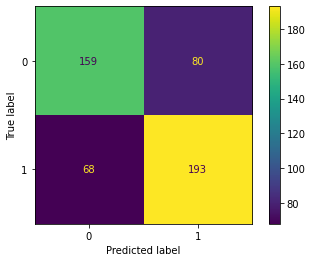

In [144]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classwise Classification Report: \n{classification_report(y_test, y_pred)}")
con_matrix = confusion_matrix(np.ravel(y_test), y_pred)
print("\nConfusion Matrix: ")
con_matrix = ConfusionMatrixDisplay(con_matrix)
con_matrix.plot()
plt.show()